In [1]:
import pandas as pd
import numpy as np

In [2]:
#Reading local Datasets

In [3]:
fakenews = pd.read_csv('data/fake.csv')   #read_csv() reading dataset files
truenews = pd.read_csv('data/true.csv')

In [4]:
fakenews.shape        #shape() tells the size of array

(23481, 4)

In [5]:
fakenews.head(2)        #head() displays the first five rows of the dataframe by default

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"


In [6]:
truenews.shape

(21417, 4)

In [7]:
truenews.head(2)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"


In [8]:
#Data Cleaning and Preparation

In [9]:
fakenews.describe()    # returns description of the data in the DataFrame. If DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [10]:
truenews.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [11]:
#Adding flag to detect fake and real news
fakenews['target'] = 'fake'
truenews['target'] = 'true'

In [12]:
fakenews.head(2)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake


In [13]:
truenews.head(2)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true


In [14]:
#Combaining both the Data Frames into One Single Data Frame
#reset_index(drop=True) drops the current index of the DataFrame and replaces it with an index of increasing integers.
news = pd.concat([fakenews, truenews]).reset_index(drop = True)
news.shape

(44898, 5)

In [15]:
#Searching for null values.
news.isna().sum()
#isna(), Detect missing values for an array-like object.
#isna().sum(), adds False and True replacing them respectively by 0 and 1.

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [16]:
news.head(3)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake


In [17]:
news.tail(3)

,title,text,subject,date,target
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [18]:
#Shuffling the fake and true news in concanate sheet data
from sklearn.utils import shuffle
news = shuffle(news)
news = news.reset_index(drop = True)
#reset_index(drop=True) drops the current index of the DataFrame and replaces it with an index of increasing integers.

In [19]:
# Checking data after shuffling
news.head()

,title,text,subject,date,target
0,Petition filed at Kenya's Supreme Court challe...,(Reuters) - A former lawmaker filed a petition...,worldnews,"November 6, 2017",true
1,Trump son-in-law Kushner's congressional state...,WASHINGTON (Reuters) - I am voluntarily provid...,politicsNews,"July 24, 2017",true
2,"Merkel, Abe agree sanctions against North Kore...",BERLIN (Reuters) - German Chancellor Angela Me...,worldnews,"September 5, 2017",true
3,Trump Tells China To Keep Our Navy Drone And ...,Donald Trump just proved once again that he is...,News,"December 17, 2016",fake
4,Trump Has Planted Spies To Ensure His Cabinet...,It s hard not to wonder just how paranoid and/...,News,"March 20, 2017",fake


In [20]:
news.tail(3)

,title,text,subject,date,target
44895,"U.N. decries Israel's killing of Gaza amputee,...",GENEVA (Reuters) - A senior U.N. official said...,worldnews,"December 19, 2017",true
44896,White House says it is reviewing House bill on...,WASHINGTON (Reuters) - The White House said it...,politicsNews,"July 25, 2017",true
44897,Family’s Dog Poisoned By Flint’s Toxic Lead W...,"For more than a year the people of Flint, Mich...",News,"February 10, 2016",fake


In [21]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [22]:
#Data Cleaning Process

In [23]:
#Removing of the dates from the news
news.drop(["date"], axis = 1, inplace = True)
news.head()

,title,text,subject,target
0,Petition filed at Kenya's Supreme Court challe...,(Reuters) - A former lawmaker filed a petition...,worldnews,true
1,Trump son-in-law Kushner's congressional state...,WASHINGTON (Reuters) - I am voluntarily provid...,politicsNews,true
2,"Merkel, Abe agree sanctions against North Kore...",BERLIN (Reuters) - German Chancellor Angela Me...,worldnews,true
3,Trump Tells China To Keep Our Navy Drone And ...,Donald Trump just proved once again that he is...,News,fake
4,Trump Has Planted Spies To Ensure His Cabinet...,It s hard not to wonder just how paranoid and/...,News,fake


In [24]:
#Removing of the titles from the news
#news.drop(["title"], axis = 1, inplace = True)
#news.head()

In [25]:
#Converting to lowercase
news['text'] = news['text'].apply(lambda x: x.lower())        
news.head(3)

,title,text,subject,target
0,Petition filed at Kenya's Supreme Court challe...,(reuters) - a former lawmaker filed a petition...,worldnews,true
1,Trump son-in-law Kushner's congressional state...,washington (reuters) - i am voluntarily provid...,politicsNews,true
2,"Merkel, Abe agree sanctions against North Kore...",berlin (reuters) - german chancellor angela me...,worldnews,true


In [26]:
#Removing of any punctuation
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
news['text'] = news['text'].apply(punctuation_removal)

In [27]:
#Check
news.head(4)

,title,text,subject,target
0,Petition filed at Kenya's Supreme Court challe...,reuters a former lawmaker filed a petition at...,worldnews,true
1,Trump son-in-law Kushner's congressional state...,washington reuters i am voluntarily providing...,politicsNews,true
2,"Merkel, Abe agree sanctions against North Kore...",berlin reuters german chancellor angela merke...,worldnews,true
3,Trump Tells China To Keep Our Navy Drone And ...,donald trump just proved once again that he is...,News,fake


In [28]:
# Removing stopwords
import nltk           #Natural Language Processing Kit
nltk.download('stopwords')       #a list of stopwords stored includes: “a”, “an”, “the”, “of”, “in”, etc.
from nltk.corpus import stopwords   #Corpus is a collection of written texts
stop = stopwords.words('english')
news['text'] = news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))  #Syntax of apply() method
#Lambda function is a small anonymous function that can take any number of arguments and execute an expression.Are utilized to construct anonymous functions

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
news.head()

,title,text,subject,target
0,Petition filed at Kenya's Supreme Court challe...,reuters former lawmaker filed petition kenya s...,worldnews,true
1,Trump son-in-law Kushner's congressional state...,washington reuters voluntarily providing state...,politicsNews,true
2,"Merkel, Abe agree sanctions against North Kore...",berlin reuters german chancellor angela merkel...,worldnews,true
3,Trump Tells China To Keep Our Navy Drone And ...,donald trump proved unfit presidentearlier wee...,News,fake
4,Trump Has Planted Spies To Ensure His Cabinet...,hard wonder paranoid andor dictatorial trump r...,News,fake


In [30]:
news.columns        #Shows total columns in the dataset

Index(['title', 'text', 'subject', 'target'], dtype='object')

In [31]:
news['subject'].value_counts()                #Shows types of news in the dataset

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [32]:
#Basic Data Exploration
#Data visualization and statistical techniques to describe dataset characterizations, such as size, quantity, and accuracy, in order to better understand the nature of the data.

In [33]:
#For using plot function and plt name
import matplotlib
import matplotlib.pyplot as plt

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


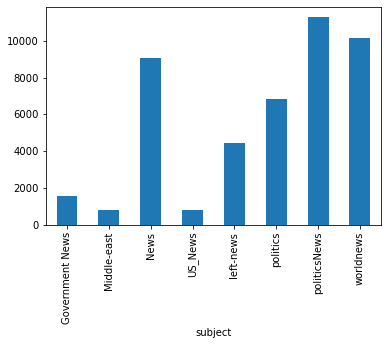

In [34]:
#Number of articles per subject available
print(news.groupby(['subject'])['text'].count())  #Split Data into Groups #Syntax
news.groupby(['subject'])['text'].count().plot(kind="bar")   #Simple Visualization Graph
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


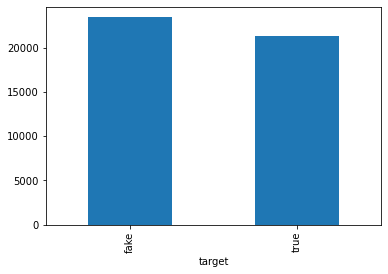

In [35]:
#Number of articles per articles available
print(news.groupby(['target'])['text'].count())
news.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [36]:
#Easiest way to visualize the max number of words used in any textual content
!pip install wordcloud      

In [37]:
# Importing Wordcloud for fake news in the dataset
from wordcloud import WordCloud

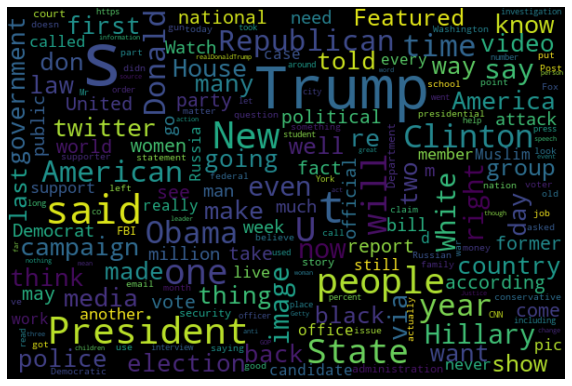

In [38]:
fakenews_news = news[news["target"] == "fake"]                 #The news data is of 'list' type right now
all_words = ' '.join([text for text in fakenews.text])         #But the wordcloud doesn't accept 'list' type data, it only accepts single text data.                 
                                                               #So here we are converting our data into 'single text data' type.
wordcloud = WordCloud(width= 600, height= 400, 
                      max_font_size = 80,collocations = False).generate(all_words)
                                                  #collocation argument is set to FALSE to ensure that the word cloud doesn't contain any bigrams or duplicate words.
plt.figure(figsize=(10,7))   #size of plot figure(figure(width, height))
plt.imshow(wordcloud, interpolation='bilinear')   #.imshow(),To display word cloud image
                                                  #wordcloud: created in the above step; interpolation=”bilinear”: used to display smoother image.
plt.axis("off")   #Hide axis from the plot
plt.show()

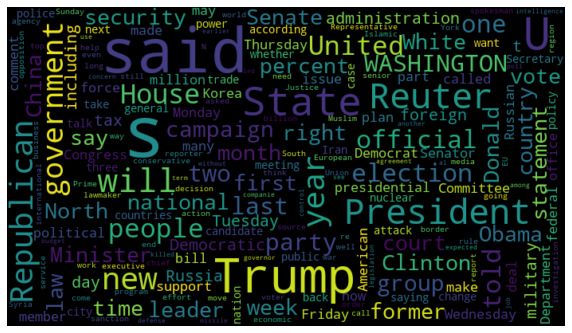

In [39]:
# Wordcloud for the true news
from wordcloud import WordCloud
true_news = news[news["target"] == "true"]
all_words = ' '.join([text for text in truenews.text])
#join(), takes all items in an iterable and joins them into one string
wordcloud = WordCloud(width= 700, height= 400,max_font_size = 90, collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.show()

In [40]:
import seaborn as sns 

In [41]:
#Most frequent words counter
from nltk import tokenize

#Tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language

token_space = tokenize.WhitespaceTokenizer()    #WhitespaceTokenizer() splits a string on whitespace, i.e., space, tab, and newline.

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)    #tokenize(), When we need to tokenize a string.We get a Python generator of token objects. 
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

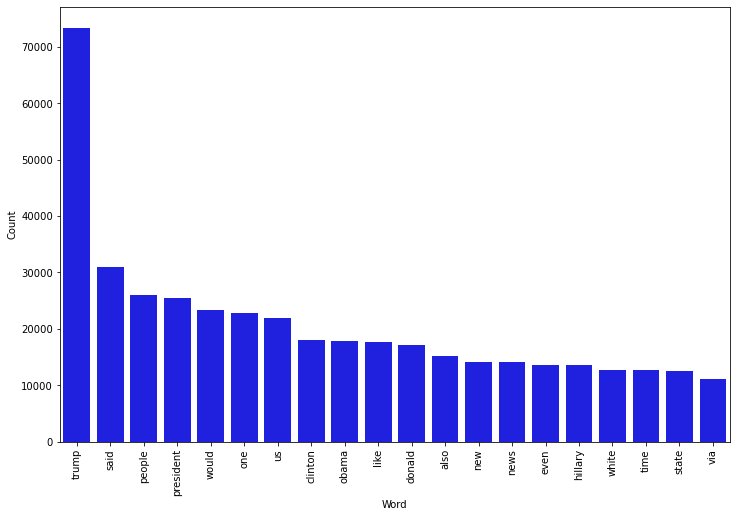

In [42]:
# Most frequent words appearance in fake news
counter(news[news["target"] == "fake"], "text", 20)

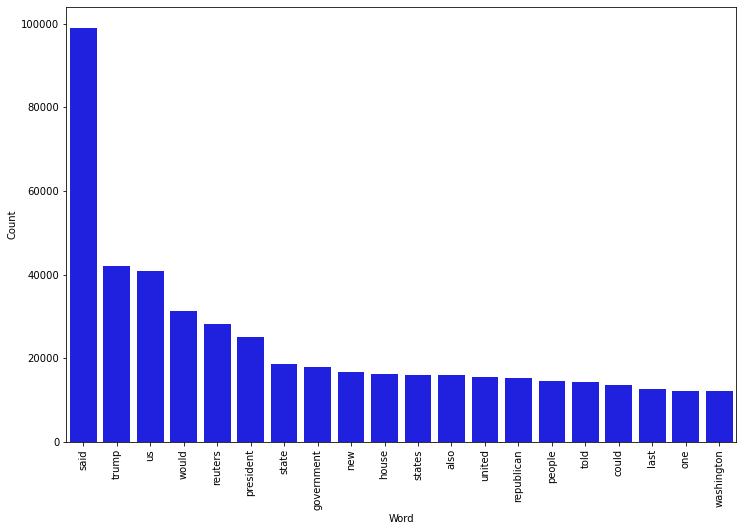

In [43]:
# Most frequent words apperance in real news
counter(news[news["target"] == "true"], "text", 20)

In [44]:
news.sample(10)

,title,text,subject,target
29403,Democratic senators press on whether White Hou...,washington reuters three democratic us senator...,politicsNews,true
6592,Hariri says Gulf states not planning measures ...,beirut reuters lebanese prime minister saad al...,worldnews,true
30863,"WHOA! FIRST LADY MELANIA Makes Classy, Yet Bli...",social media erupted yesterday outspoken comed...,left-news,fake
14041,Appellate judge Kelly considered for Supreme C...,washington reuters white house vetting federal...,politicsNews,true
25463,[Video] BLACK CHAMBER OF COMMERCE PRESIDENT SA...,america first black president continues destro...,politics,fake
30998,US Advising Soldiers to Be ‘Less Masculine’ as...,170619naa175092san diego june 19 2017 command ...,Middle-east,fake
41425,Reeling Republican establishment running out o...,miami reuters senator ted cruz took stage tues...,politicsNews,true
5524,Jimmy Carter: ‘Koreans Want Peace Treaty to Re...,21st century wire says reframing current diplo...,Middle-east,fake
18295,CNN CLOWN Who Cries About “FAKE NEWS” Uses Unv...,video featured youtube prankster named adam sa...,left-news,fake
22970,AIRPORT PASSENGER “PAT DOWNS” Get More Intrusi...,one woman awful experience airport could soon ...,Government News,fake


In [45]:
#Modeling

In [46]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [47]:
#Splitting of The Data

In [48]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [49]:
#Split the data
X_train,X_test,y_train,y_test = train_test_split(news['text'], news.target, test_size=0.2, random_state=42)

In [50]:
X_train.head()

36335    ap president donald trump told congressional l...
12384    wondering could get cake says gay marriage wro...
24419    please note story contains strong language fin...
24740    toddlerinchief busy morning lashing hillary cl...
27039    war fight sovereignty america two things donal...
Name: text, dtype: object

In [51]:
y_train.head()

36335    fake
12384    fake
24419    true
24740    fake
27039    fake
Name: target, dtype: object

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
# Training via Decision Tree Classifier Algorithm

In [54]:
from sklearn.tree import DecisionTreeClassifier

#Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                           max_depth = 20, splitter='best', random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.63%


Confusion matrix, without normalization


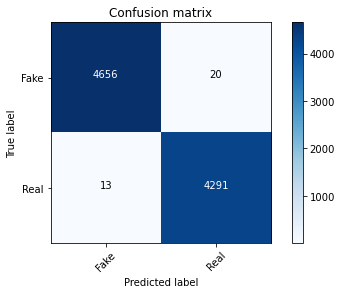

In [55]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [56]:
#Will be using Desision Tree Classifier Algorithm,
#as it provides accuracy of 99.63%
#Whereas Naive Bayes Algorithm provides accuracy of only 81.4% 

In [57]:
accuracy_score(y_test, prediction)

0.9963251670378619

In [58]:
from sklearn.metrics import classification_report

In [59]:
#print(classification_report(y_train, prediction))